# Midterm Exam

## Grading Rubric

Each question is worth 20 points. The answer to each question will be graded in terms of:


* Correct Analysis & Computation `(8 points)`
  - Correct use of pandas operations (groupby, aggregation, filtering).
  - Accurate statistics or summaries.

* Appropriate Use of Visuals / Tables — `(6 points)`
  - Visualization or table is relevant to the question.
  - Plot type is appropriate (bar, boxplot, line, etc.).
  - Labels and axes are clear.


* Interpretation and Reasoning — `(6 points)`
  - Conclusions are clearly stated.
  - Interpretations are supported by data.
  - Reasoning is logical and coherent.

## Variable Definitions

* **hotel**
  - H1 = Resort Hotel
  - H2 = City Hotel

* **is_canceled** - Value indicating if the booking was canceled.
  - (1) canceled
  - (0) not canceled

* **lead_time** - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* **arrival_date_year** - Year of arrival date

* **arrival_date_month** - Month of arrival date

* **arrival_date_week_number** - Week number of year for arrival date

* **arrival_date_day_of_month** - Day of arrival date

* **stays_in_weekend_nights** - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

* **stays_in_week_nights** - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

* **adults** - Number of adults

* **children** - Number of children

* **babies** - Number of babies

* **meal** - Type of meal booked. Categories are presented in standard hospitality meal packages:
  - Undefined/SC – no meal package.
  - BB – Bed & Breakfast.
  - HB – Half board (breakfast and one other meal – usually dinner).
  - FB – Full board (breakfast, lunch and dinner)

* **country** - Country of origin. Categories are represented in the ISO 3155–3:2013 format

* **market_segment** - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **distribution_channel** - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

* **is_repeated_guest** - Value indicating if the booking name was from a repeated guest.
  - 1 is a repeated guest.
  - 0 is not a repeated guest.

* **previous_cancellations** - Number of previous bookings that were cancelled by the customer prior to the current booking

* **previous_bookings_not_canceled** - Number of previous bookings not cancelled by the customer prior to the current booking

* **reserved_room_type** - Code of room type reserved. Code is presented instead of designation for anonymity reasons.

* **assigned_room_type** - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

* **booking_changes** - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

* **deposit_type** - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:

  - No Deposit – no deposit was made.
  - Non Refund – a deposit was made in the value of the total stay cost.  
  - Refundable – a deposit was made with a value under the total cost of stay.

* **agent** - ID of the travel agency that made the booking

* **company** - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

* **days_in_waiting_list** - Number of days the booking was in the waiting list before it was confirmed to the customer

* **customer_type** - Type of booking, assuming one of four categories:   

  - Contract - when the booking has an allotment or other type of contract associated to it.
  - Group – when the booking is associated to a group.
  - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
  - Transient-party – when the booking is transient, but is associated to at least other transient booking

* **adr** - Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

* **required_car_parking_spaces** - Number of car parking spaces required by the customer

* **total_of_special_requests** - Number of special requests made by the customer (e.g. twin bed or high floor)

* **reservation_status** - Reservation last status, assuming one of three categories:
  - Canceled – booking was canceled by the customer.
  - Check-Out – customer has checked in but already departed.
  - No-Show – customer did not check-in and did inform the hotel of the reason why

* **reservation_status_date** - Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Andrew Laurence\.cache\kagglehub\datasets\jessemostipak\hotel-booking-demand\versions\1


In [16]:
import os
import pandas as pd

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Dataset Overview & Core Distributions `(20 points)`

**Question:** What do the shapes and spread of the `lead_time` and `adr` distributions suggest about typical booking behavior and extreme cases in this dataset?

Perform an exploratory analysis of the distributional characteristics of key numerical variables in the hotel booking dataset.

You must:
- Analyze the distribution of lead_time and adr
- Use appropriate summary statistics and visualizations to support your analysis
- Identify any skewness and/or outliers in these variables

In [42]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [47]:
vars_of_interest = ['lead_time', 'adr']

In [48]:
summary_stats = df[vars_of_interest].describe().T
print("Summary Statistics:\n")
print(summary_stats)

Summary Statistics:

              count        mean         std   min    25%     50%    75%  \
lead_time  119390.0  104.011416  106.863097  0.00  18.00  69.000  160.0   
adr        119390.0  101.831122   50.535790 -6.38  69.29  94.575  126.0   

              max  
lead_time   737.0  
adr        5400.0  


In [50]:
df[vars_of_interest].skew()

lead_time     1.346550
adr          10.530214
dtype: float64

(<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>)

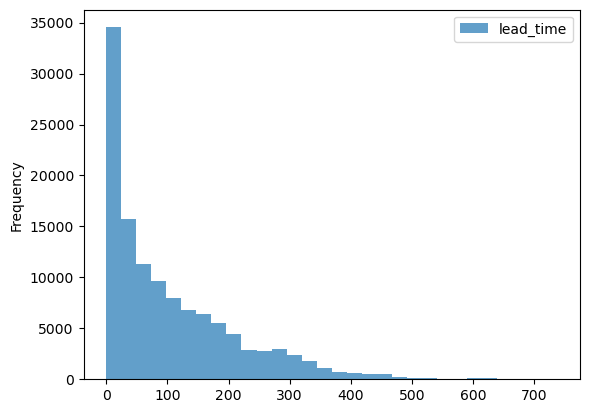

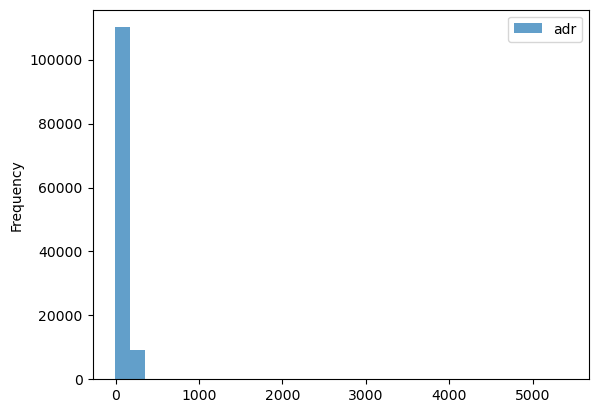

In [63]:
df.plot.hist(y='lead_time', bins=30, alpha=0.7), df.plot.hist(y='adr', bins=30, alpha=0.7)

<Axes: xlabel='lead_time', ylabel='adr'>

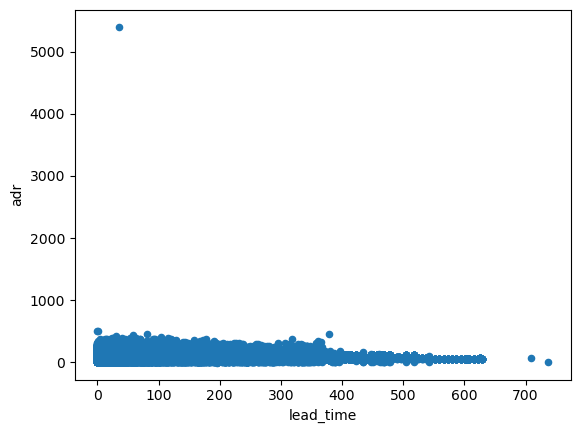

In [31]:
df.plot.scatter(x = 'lead_time', y = 'adr')

The analysis shows a clear positive relationship between lead time and cancellation likelihood. 
Bookings made well in advance exhibit higher cancellation rates while last-minute reservations are more stable. 
This suggests that lead time is a strong predictive factor for booking cancellations and should be considered in revenue management and overbooking strategies.

## 2. Booking Cancellations and Lead Time `(20 points)`

**Question**: Do bookings with longer lead times tend to cancel more often?

Analyze how `lead_time` differs between canceled and non-canceled bookings.

You must:
- Compute appropriate summary statistics
- Use at least one visualization
- Clearly describe the pattern you observe



In [77]:
df.groupby('is_canceled')['lead_time'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])

,count,mean,median,std,min,max
is_canceled,,,,,,
0,75166,79.984687,45.0,91.109888,0,737
1,44224,144.848815,113.0,118.624829,0,629


In [78]:
df.groupby('is_canceled')['lead_time'].quantile([0.25, 0.5, 0.75]).unstack()

,0.25,0.50,0.75
is_canceled,,,
0,9.0,45.0,124.0
1,48.0,113.0,214.0


In [79]:
df['lead_time_bin'] = pd.cut(
    df['lead_time'],
    bins=[0, 30, 90, 180, 365, 800],
    include_lowest=True
)

In [124]:
df.groupby('lead_time_bin')['is_canceled'].mean().reset_index(name='cancellation_rate')

C:\Users\Andrew Laurence\AppData\Local\Temp\ipykernel_13524\1773742019.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('lead_time_bin')['is_canceled'].mean().reset_index(name='cancellation_rate')


,lead_time_bin,cancellation_rate
0,"(-0.001, 30.0]",0.185630
1,"(30.0, 90.0]",0.376984
2,"(90.0, 180.0]",0.447105
3,"(180.0, 365.0]",0.554540
4,"(365.0, 800.0]",0.676620


<Axes: xlabel='Lead Time (days)', ylabel='Cancellation Rate'>

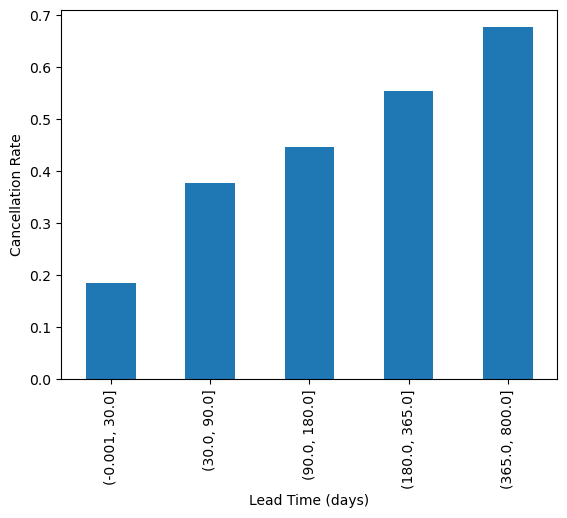

In [125]:
cancellation_rate.plot.bar(ylabel='Cancellation Rate',xlabel='Lead Time (days)')

Yes bookings with longer lead times tend to cancel more often.

## 3. Seasonality and Pricing `(20 points)`

**Question**: Do `Resort Hotels` and `City Hotels` exhibit different seasonal pricing behaviors throughout the year? If so, during which months are these differences most pronounced?

Analyze how Average Daily Rate (ADR) varies across arrival months, and compare this pattern between Resort Hotels and City Hotels.

You must:
- Aggregate ADR by month and hotel type
- Use a visualization to support your analysis
- Identify at least one seasonal pricing pattern

In [94]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_bin
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,"(-0.001, 30.0]"
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,"(90.0, 180.0]"
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,"(30.0, 90.0]"
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,"(90.0, 180.0]"
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07,"(180.0, 365.0]"


In [103]:
monthly_adr = df.groupby(['hotel', 'arrival_date_month'])['adr'].mean().reset_index()
print(monthly_adr)

           hotel arrival_date_month         adr
0     City Hotel              April  111.251838
1     City Hotel             August  114.680455
2     City Hotel           December   88.826307
3     City Hotel           February   85.088278
4     City Hotel            January   82.628986
5     City Hotel               July  110.734292
6     City Hotel               June  119.074341
7     City Hotel              March   92.643116
8     City Hotel                May  121.638560
9     City Hotel           November   88.069601
10    City Hotel            October   99.974498
11    City Hotel          September  110.004661
12  Resort Hotel              April   77.849496
13  Resort Hotel             August  186.790574
14  Resort Hotel           December   68.984230
15  Resort Hotel           February   55.171930
16  Resort Hotel            January   49.461883
17  Resort Hotel               July  155.181299
18  Resort Hotel               June  110.444749
19  Resort Hotel              March   57

In [104]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

monthly_adr['arrival_date_month'] = pd.Categorical(
    monthly_adr['arrival_date_month'],
    categories=month_order,
    ordered=True
)

In [116]:
adr_pivot = monthly_adr.pivot(index='arrival_date_month', columns='hotel', values='adr')

print("Average ADR by Month and Hotel Type:\n")
print(adr_pivot)

Average ADR by Month and Hotel Type:

hotel               City Hotel  Resort Hotel
arrival_date_month                          
January              82.628986     49.461883
February             85.088278     55.171930
March                92.643116     57.520147
April               111.251838     77.849496
May                 121.638560     78.758134
June                119.074341    110.444749
July                110.734292    155.181299
August              114.680455    186.790574
September           110.004661     93.252030
October              99.974498     62.097617
November             88.069601     48.273993
December             88.826307     68.984230


<Axes: xlabel='Arrival Month', ylabel='Average Daily Rate'>

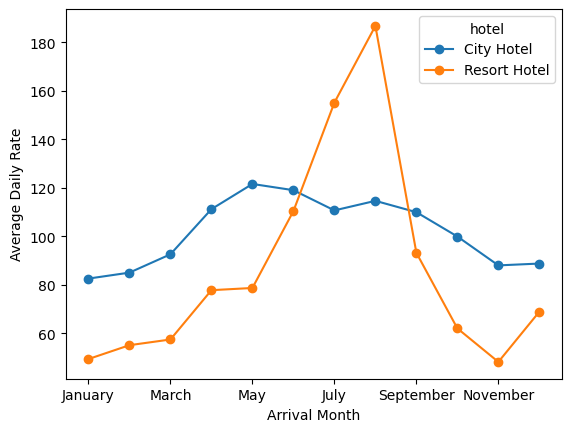

In [113]:
adr_pivot.plot(xlabel='Arrival Month', ylabel='Average Daily Rate', marker='o',
)

Yes, Resort Hotels and City Hotels exhibit different seasonal pricing behaviors.

## 4. Customer Behavior `(20 points)`

**Question:** Do repeated guests behave differently from first-time guests?

Compare repeated guests and non-repeated guests in terms of:
- Cancellation rate
- Booking behavior (e.g., booking changes or lead time)
- Use summary statistics and/or visualizations to support your answer.


In [143]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_bin
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,"(180.0, 365.0]"
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,"(365.0, 800.0]"
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,"(-0.001, 30.0]"
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,"(-0.001, 30.0]"
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,"(-0.001, 30.0]"


In [ ]:
guest_behavior = (
    df.groupby('is_repeated_guest')
      .agg(
          cancellation_rate=('is_canceled', 'mean'),
          avg_lead_time=('lead_time', 'mean'),
          median_lead_time=('lead_time', 'median'),
          avg_booking_changes=('booking_changes', 'mean')
      )
)

print("Guest Behavior Summary Statistics:\n")
print(guest_behavior)

Guest Behavior Summary Statistics:

                   cancellation_rate  avg_lead_time  median_lead_time  \
is_repeated_guest                                                       
0                           0.377851     106.425221              72.0   
1                           0.144882      30.786352               3.0   

                   avg_booking_changes  
is_repeated_guest                       
0                             0.219692  
1                             0.264567  


<Axes: title={'center': 'Average Lead Time by Guest Type'}, xlabel='Guest Type', ylabel='Average Lead Time (days)'>

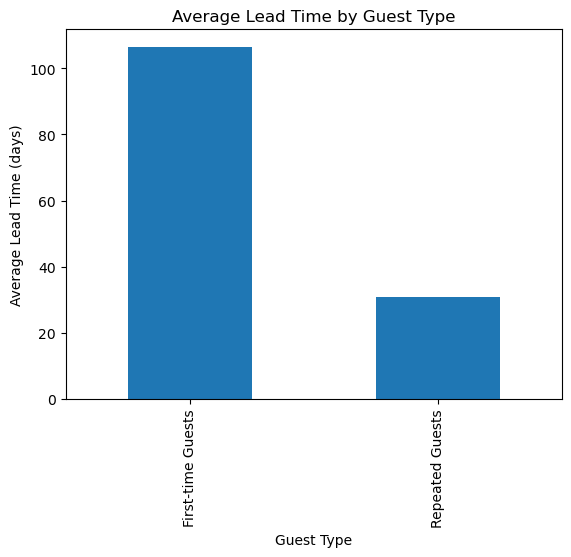

In [121]:
guest_behavior['avg_lead_time'].plot.bar(ylabel='Average Lead Time (days)', xlabel='Guest Type', title='Average Lead Time by Guest Type')

<Axes: title={'center': 'Average Booking Behavior by Guest Type'}, xlabel='Guest Type', ylabel='Average Value'>

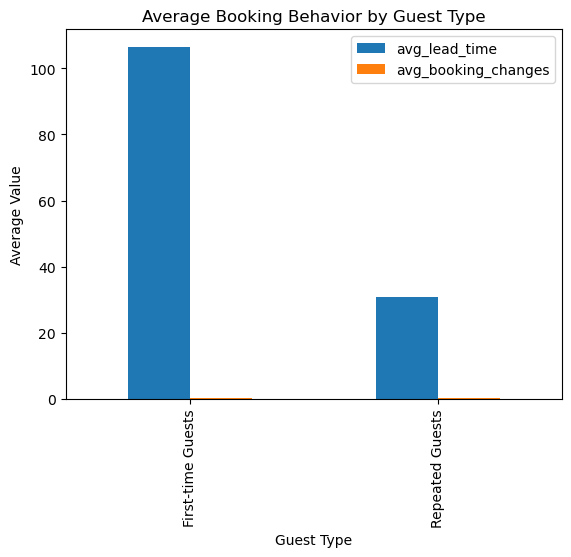

In [ ]:
guest_behavior[['avg_lead_time', 'avg_booking_changes']].plot(
    kind='bar',
    title='Average Booking Behavior by Guest Type',
    ylabel='Average Value',
    xlabel='Guest Type',
)

Yes, repeated guests behave differently from first-time guests, Repeated guests are less likely to cancel and tend to book closer to arrival.

## 5. Booking Cancellation Insights `(20 points)`

**Question:** Which combination of variables appears to have the strongest relationship with booking cancellations, and how do these variables interact to influence the likelihood of a cancellation?


Using at least three variables from the dataset, identify one strong pattern related to booking cancellations.

Your answer must:
- Clearly state the pattern
- Explain how the variables interact
- Support the conclusion with data


In [151]:
df['lead_time_group'] = pd.cut(df['lead_time'],bins=[0, 30, 90, 180, 365, 800],labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'],include_lowest=True)

In [152]:
cancellation_pattern = (df.groupby(['lead_time_group', 'deposit_type', 'is_repeated_guest'])['is_canceled'].mean().reset_index(name='cancellation_rate'))

print("Cancellation Rate by Lead Time, Deposit Type, and Guest Type:\n")
print(cancellation_pattern.sort_values('cancellation_rate', ascending=False).head(10))

Cancellation Rate by Lead Time, Deposit Type, and Guest Type:

   lead_time_group deposit_type  is_repeated_guest  cancellation_rate
26       Very Long   Non Refund                  0           1.000000
20            Long   Non Refund                  0           0.998575
8            Short   Non Refund                  0           0.997922
14          Medium   Non Refund                  0           0.988989
2       Very Short   Non Refund                  0           0.943739
3       Very Short   Non Refund                  1           0.937500
19            Long   No Deposit                  1           0.803571
10           Short   Refundable                  0           0.500000
18            Long   No Deposit                  0           0.390976
12          Medium   No Deposit                  0           0.349747


C:\Users\Andrew Laurence\AppData\Local\Temp\ipykernel_13524\1355752195.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_pattern = (df.groupby(['lead_time_group', 'deposit_type', 'is_repeated_guest'])['is_canceled'].mean().reset_index(name='cancellation_rate'))


<Axes: title={'center': 'Cancellation Rate by Lead Time and Guest Type (No Deposit)'}, xlabel='Lead Time Group', ylabel='Canellation Rate'>

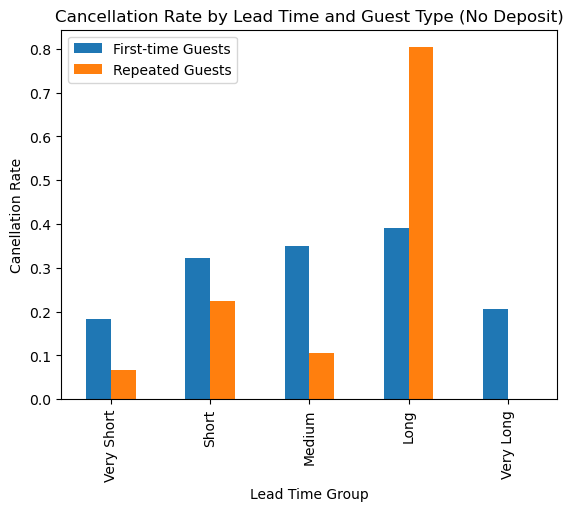

In [ ]:
no_deposit = cancellation_pattern[
    cancellation_pattern['deposit_type'] == 'No Deposit'
]

pivot_table = no_deposit.pivot(
    index='lead_time_group',
    columns='is_repeated_guest',
    values='cancellation_rate'
)

pivot_table.columns = ['First-time Guests', 'Repeated Guests']

pivot_table.plot.bar(ylabel='Canellation Rate', xlabel='Lead Time Group', title='Cancellation Rate by Lead Time and Guest Type (No Deposit)')

The strongest relationship with booking cancellations is driven by the interaction of Long lead times, no deposit policy and 